/tmp/ipython-input-724147843.py:39: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-724147843.py:39: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


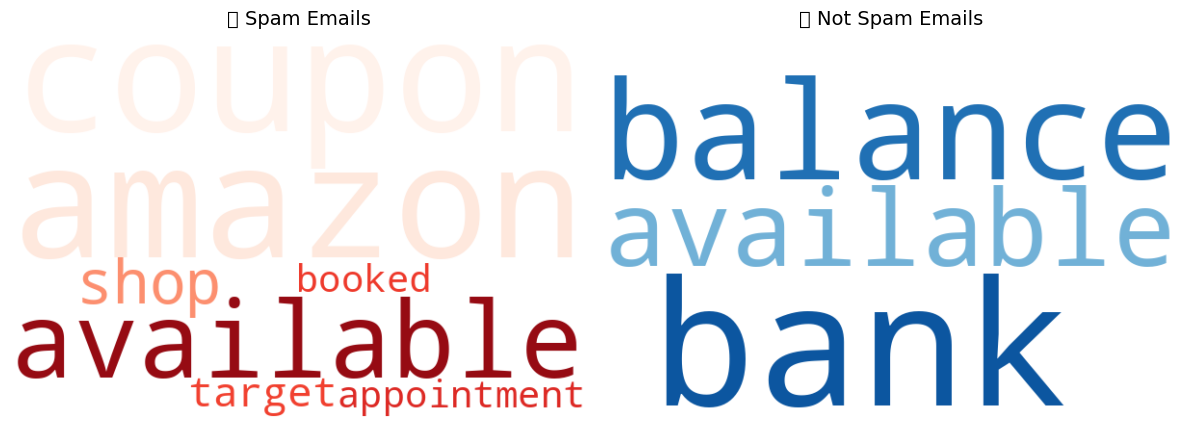

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Step 1: Create your dataset ---
script = {
    'email': [
        'amazon coupon available',
        'bank balance available',
        '50 % off when you shop on target',
        'appointment is booked'
    ],
    'sentiment': ['spam', 'not spam', 'spam', 'spam']
}

df1 = pd.DataFrame(script)

# --- Step 2: Split text based on sentiment ---
spam_text = " ".join(df1[df1['sentiment'] == 'spam']['email'])
not_spam_text = " ".join(df1[df1['sentiment'] == 'not spam']['email'])

# --- Step 3: Create word clouds ---
spam_wc = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(spam_text)
not_spam_wc = WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(not_spam_text)

# --- Step 4: Plot them side by side ---
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(spam_wc, interpolation="bilinear")
plt.title("🚨 Spam Emails", fontsize=14)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(not_spam_wc, interpolation="bilinear")
plt.title("✅ Not Spam Emails", fontsize=14)
plt.axis("off")

plt.tight_layout()
plt.show()


In [3]:
#Classifying movie reviews
#import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
# create sample dataset
data = {
    'review': [
        "I loved the movie, it was fantastic!",
        "The film was terrible and boring",
        "Amazing storyline and great acting",
        "Worst movie I have ever seen",
        "I really enjoyed the film",
        "The plot was dull and predictable"
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']
}

df = pd.DataFrame(data)

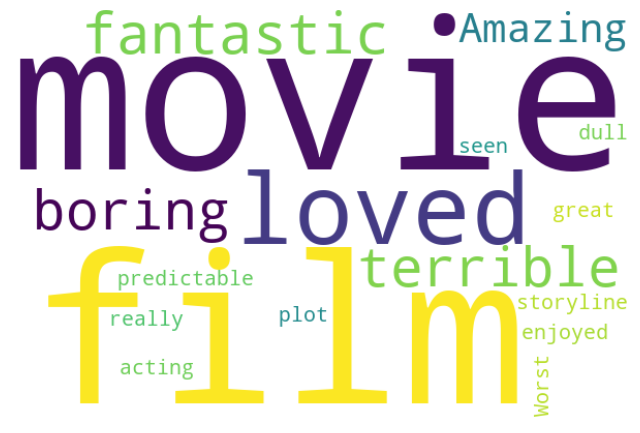

In [5]:
#Step 3: Word Cloud (Visualization)
text = " ".join(df['review'])
wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
#Step 4: Feature Extraction (BoW & TF-IDF)
bow = CountVectorizer()
X_bow = bow.fit_transform(df['review'])
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['review'])

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.3, random_state=42)

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.0
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

